In [79]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, Lasso, Ridge, RidgeCV, ElasticNet
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import LabelEncoder, StandardScaler

import seaborn as sn #visual representation



In [80]:
# Import the file with pandas
df = pd.read_csv('lisbon-houses.csv.xls') 

# print the first lines
df.head(5)


,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Country,District,Municipality,Parish,Price M2,Price
0,101,Used,Homes,Apartment,3,1,76,152,0,38.7792,-9.1186,Portugal,Lisboa,Lisboa,Olivais,2463,198000
1,102,Used,Homes,Duplex,5,3,190,380,0,38.7056,-9.1784,Portugal,Lisboa,Lisboa,Alcantara,3125,1270000
2,103,Used,Homes,Apartment,1,1,26,52,0,38.7058,-9.1639,Portugal,Lisboa,Lisboa,Estrela,4005,140000
3,104,Used,Homes,Apartment,5,4,185,370,0,38.7466,-9.1640,Portugal,Lisboa,Lisboa,Sao Domingos de Benfica,3412,995000
4,105,Used,Homes,Apartment,7,1,150,300,0,38.7323,-9.1287,Portugal,Lisboa,Lisboa,Arroios,3277,570000


In [81]:
df = df.drop(['Country', 'District','Municipality'], axis=1)
df = df.drop(['Id'], axis=1)


Result dataframe :
              Condition       PropertyType     PropertySubType  Bedrooms  \
49                Used  Single Habitation            Dwelling         5   
50                Used  Single Habitation      Isolated Villa        11   
199             As New  Single Habitation  Townhouse Dwelling         6   
200             As New  Single Habitation  Townhouse Dwelling         2   
243  For Refurbishment  Single Habitation  Townhouse Dwelling         2   
244  For Refurbishment  Single Habitation            Dwelling         4   
245  For Refurbishment  Single Habitation  Townhouse Dwelling         2   

     Bathrooms  AreaNet  AreaGross  Parking  Latitude  Longitude     Parish  \
49           3      190        380        0   38.7723    -9.1198    Olivais   
50           6      573       1146        0   38.7497    -9.1347   Alvalade   
199          3      208        416        0   38.7455    -9.2067    Benfica   
200          3      160        320        0   38.6992    -9.21

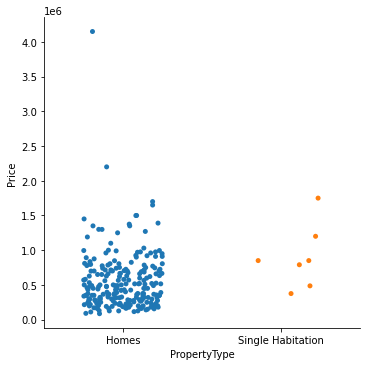

In [82]:
sn.catplot(x='PropertyType', y='Price',  data=df,jitter='0.25')

lim_df = df[df['PropertyType'] == 'Single Habitation'] 
  
print('\nResult dataframe :\n', lim_df) 


Result dataframe :
              Condition       PropertyType     PropertySubType  Bedrooms  \
1                 Used              Homes              Duplex         5   
49                Used  Single Habitation            Dwelling         5   
50                Used  Single Habitation      Isolated Villa        11   
51                 New              Homes           Penthouse         3   
55                 New              Homes              Duplex         1   
126                New              Homes              Studio         0   
127                New              Homes              Studio         0   
144                New              Homes              Duplex         6   
146                New              Homes              Duplex         5   
156             As New              Homes              Duplex         3   
176             As New              Homes              Duplex         2   
187             As New              Homes         Apart Hotel         0   
192 

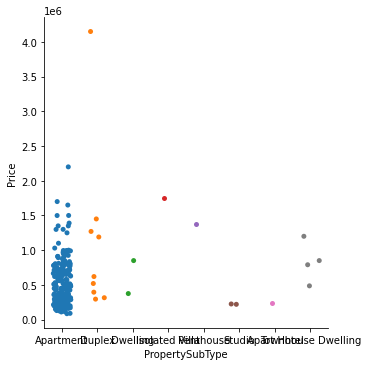

In [83]:
sn.catplot(x='PropertySubType', y='Price',  data=df,jitter='0.25')

lim_df = df[df['PropertySubType'] != 'Apartment'] 
  
print('\nResult dataframe :\n', lim_df) 

In [84]:
df = df[df.PropertyType == 'Homes']
df = df.drop(['PropertyType'], axis=1)

df = df[df.PropertySubType == 'Apartment']
df = df.drop(['PropertySubType'], axis=1)

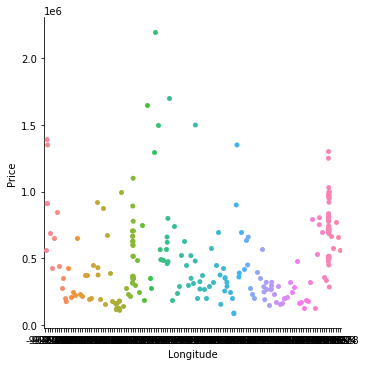

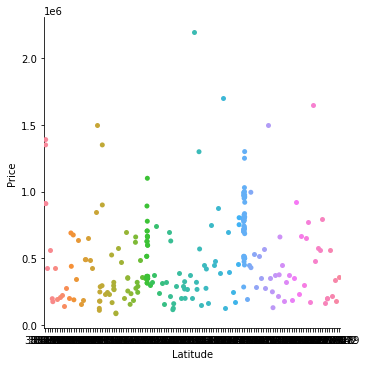

In [85]:
sn.catplot(x='Longitude', y='Price',  data=df,jitter='0.25')
sn.catplot(x='Latitude', y='Price',  data=df,jitter='0.25')

In [86]:
df = df.drop(['Longitude', 'Latitude'], axis=1)

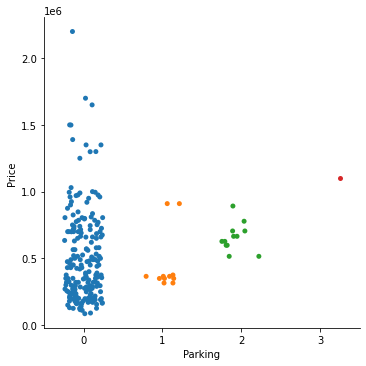

In [87]:
sn.catplot(x='Parking', y='Price',  data=df,jitter='0.25')

In [88]:
df['WithParking'] = np.where(df['Parking'] == '0', '0', '1')
df = df.drop(['Parking'], axis=1)



In [89]:
df.head()

,Condition,Bedrooms,Bathrooms,AreaNet,AreaGross,Parish,Price M2,Price,WithParking
0,Used,3,1,76,152,Olivais,2463,198000,1
2,Used,1,1,26,52,Estrela,4005,140000,1
3,Used,5,4,185,370,Sao Domingos de Benfica,3412,995000,1
4,Used,7,1,150,300,Arroios,3277,570000,1
5,Used,3,2,95,190,Belem,3542,425000,1


In [90]:
df=pd.get_dummies(df)
#le = LabelEncoder()
#df['Parish'] = le.fit_transform(df['Parish'])
#df['Condition'] = le.fit_transform(df['Condition'])
df.head(30)

,Bedrooms,Bathrooms,AreaNet,AreaGross,Price M2,Price,Condition_As New,Condition_For Refurbishment,Condition_New,Condition_Used,...,Parish_Misericordia,Parish_Olivais,Parish_Parque das Nacoes,Parish_Penha de Franca,Parish_Santa Clara,Parish_Santa Maria Maior,Parish_Santo Antonio,Parish_Sao Domingos de Benfica,Parish_Sao Vicente,WithParking_1
0,3,1,76,152,2463,198000,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,1,1,26,52,4005,140000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,5,4,185,370,3412,995000,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,7,1,150,300,3277,570000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,3,2,95,190,3542,425000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,3,1,76,152,2881,130000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,3,1,81,162,3412,215000,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
8,2,1,58,116,2463,196000,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
9,5,3,286,572,2927,925000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
10,2,1,68,136,2881,170000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [91]:
df.head()
df.shape

(226, 35)

In [92]:
y = df["Price"].values
X = df.drop("Price", axis=1).values

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.10,random_state=100)


In [93]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler ## standrard scalig 
from sklearn.compose import ColumnTransformer

#scaler = StandardScaler() #initialise to a variable
#scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
#X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
#X_test_scaled = scaler.transform(X_test) # transform the test data 

scaler = StandardScaler() #initialise to a variable
scaler2 = MinMaxScaler()
#scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
col_names=['AreaNet', 'Price M2', 'AreaGross']
features = df[col_names]


ct = ColumnTransformer([
        ('somename', StandardScaler(), [ 'AreaNet', 'Price M2', 'AreaGross'])
    ], remainder='passthrough')
features2 = pd.DataFrame(ct.fit_transform(features))

X_train_scaled = X_train.copy()
X_train_scaled[col_names]  = features2

X_test_scaled = X_test.copy()
X_test_scaled[col_names] = features2

X_test_scaled=X_test_scaled.dropna()
X_train_scaled=X_test_scaled.dropna()


X_test_scaled = X_test_scaled.reset_index()

X_train_scaled = X_train_scaled.reset_index()

In [94]:
X_train_scaled.head()

,index,Bedrooms,Bathrooms,AreaNet,AreaGross,Price M2,Price,Condition_As New,Condition_For Refurbishment,Condition_New,...,Parish_Misericordia,Parish_Olivais,Parish_Parque das Nacoes,Parish_Penha de Franca,Parish_Santa Clara,Parish_Santa Maria Maior,Parish_Santo Antonio,Parish_Sao Domingos de Benfica,Parish_Sao Vicente,WithParking_1
0,67,1,1,-1.136931,-1.136931,0.502543,275000,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,184,2,1,1.347089,1.347089,0.066532,430000,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,101,3,3,-0.467478,-0.467478,-0.842627,975000,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,210,4,2,-0.872673,-0.872673,-0.297957,900000,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,163,3,3,-0.062284,-0.062284,2.225956,579000,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [95]:
X_train_scaled = X_train_scaled.drop(['index'], axis=1)
X_test_scaled = X_test_scaled.drop(['index'], axis=1)

In [96]:

dfobj = pd.DataFrame(X_test_scaled)
 
dfobj = dfobj.isin([np.inf, -np.inf])
 
print('infinte values in DataFrame:',dfobj)
count = np.isinf(dfobj).values.sum()
print("Total infinte values in Pandas Dataframe: " ,count)
print("Total Nan values in Pandas Dataframe: ", X_train_scaled.isna(). sum().any())

infinte values in DataFrame:     Bedrooms  Bathrooms  AreaNet  AreaGross  Price M2  Price  \
0      False      False    False      False     False  False   
1      False      False    False      False     False  False   
2      False      False    False      False     False  False   
3      False      False    False      False     False  False   
4      False      False    False      False     False  False   
5      False      False    False      False     False  False   
6      False      False    False      False     False  False   
7      False      False    False      False     False  False   
8      False      False    False      False     False  False   
9      False      False    False      False     False  False   
10     False      False    False      False     False  False   
11     False      False    False      False     False  False   
12     False      False    False      False     False  False   
13     False      False    False      False     False  False   
14     Fals

In [97]:
y_train = X_train_scaled["Price"].values
X_train_scaled = X_train_scaled.drop("Price", axis=1).values

y_test = X_test_scaled["Price"].values
X_test_scaled = X_test_scaled.drop("Price", axis=1).values

In [98]:
X_train_scaled[3]

array([ 4.        ,  2.        , -0.87267319, -0.87267319, -0.29795694,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

# #MODELS

In [99]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled,y_train)
y_p=model_lr.predict(X_test_scaled)

error = y_p - y_test
print(error)
squared_error = np.dot(error, error)
mean_squared_error = squared_error / y_test.shape[0]
print(np.sqrt(mean_squared_error))


df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_p})
print(df2.head(10))

from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_p))
print('Loss:', metrics.mean_squared_error(y_test,y_p))

[ 4.65661287e-10 -4.65661287e-10  8.14155227e+02 -9.29003487e+04
 -2.32830644e-10 -3.98065732e+04 -2.51833595e+04  1.22169766e+04
 -2.51833595e+04  2.69064858e+04  2.32830644e-10 -1.55984802e+04
  9.29003487e+04  2.51833595e+04  6.30022370e+04  2.67754414e+04
 -8.99087227e+04 -1.74622983e-10  2.51833595e+04  1.55984802e+04
 -7.56699592e-10]
41122.69985640996
    Actual     Predicted
0   275000  2.750000e+05
1   430000  4.300000e+05
2   975000  9.758142e+05
3   900000  8.070997e+05
4   579000  5.790000e+05
5   715000  6.751934e+05
6   320000  2.948166e+05
7  1030000  1.042217e+06
8   690000  6.648166e+05
9   450000  4.769065e+05
R2- SCORE: 0.9890956415451846
Loss: 1691076443.48038


In [100]:
#LASSO
#modelo_lassoCV = LassoCV(cv=10, fit_intercept=True,tol=0.001,eps=0.0000001,n_alphas=95).fit(X_train_scaled, y_train)
#model_lasso = Lasso(alpha = modelo_lassoCV.alpha_,tol=0.001,fit_intercept=True)
model_lasso = Lasso(alpha = 0.0001,tol=0.0001,fit_intercept=True, max_iter=50000)
model_lasso.fit(X_train_scaled,y_train)
y_pred = model_lasso.predict(X_test_scaled)

error = y_pred - y_test
print(error.shape)

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df2.head(10))

from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test,y_pred))

(21,)
    Actual     Predicted
0   275000  2.750000e+05
1   430000  4.300000e+05
2   975000  9.758142e+05
3   900000  8.070996e+05
4   579000  5.790000e+05
5   715000  6.751934e+05
6   320000  2.948166e+05
7  1030000  1.042217e+06
8   690000  6.648166e+05
9   450000  4.769065e+05
R2- SCORE: 0.9890956415451845
MAPE: 0.06744806264119138


/Users/gabrielmarques/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386623454.82344055, tolerance: 325673495.2380952
  model = cd_fast.enet_coordinate_descent(


In [101]:
alpha= np.arange(0.0000001, 0.1, 0.000001)
modelo_ridgeCV = RidgeCV(alphas=alpha, fit_intercept=False).fit(X_train_scaled, y_train)

model_ridge = Ridge(alpha = modelo_ridgeCV.alpha_, normalize = False,fit_intercept=False, tol = 0.001, \
              solver ='sag', random_state = 123)

model_ridge.fit(X_train_scaled, y_train)
y_pred=model_ridge.predict(X_test_scaled)


df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_p})
print(df2.head(10))

from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_p))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test,y_pred))

    Actual     Predicted
0   275000  2.750000e+05
1   430000  4.300000e+05
2   975000  9.758142e+05
3   900000  8.070997e+05
4   579000  5.790000e+05
5   715000  6.751934e+05
6   320000  2.948166e+05
7  1030000  1.042217e+06
8   690000  6.648166e+05
9   450000  4.769065e+05
R2- SCORE: 0.9890956415451846
MAPE: 0.11397596453286088


In [102]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model_lr,X_train_scaled,y_train))

[-0.44617609 -0.95410673  0.86888696  0.41747094 -0.71509783]
